In [5]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
import warnings

In [6]:

# Ignore warnings for cleaner output
warnings.filterwarnings("ignore")

# Load the dataset
df = pd.read_csv('Data.csv')

# Display first few rows to understand the structure of data
print(df.head())

     Age Feeling sad or Tearful Irritable towards baby & partner  \
0  35-40                    Yes                              Yes   
1  40-45                    Yes                               No   
2  35-40                    Yes                               No   
3  35-40                    Yes                              Yes   
4  40-45                    Yes                               No   

  Trouble sleeping at night Problems concentrating or making decision  \
0   Two or more days a week                                       Yes   
1                        No                                       Yes   
2                       Yes                                       Yes   
3                       Yes                                       Yes   
4   Two or more days a week                                       Yes   

  Overeating or loss of appetite Feeling of guilt  \
0                            Yes               No   
1                            Yes              

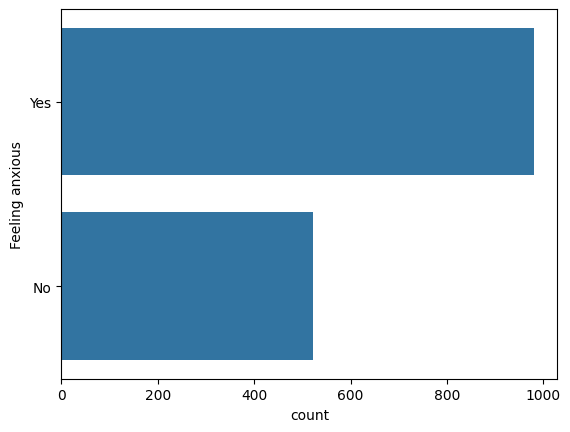

In [7]:
# Visualize distribution of target variable
sns.countplot(df['Feeling anxious'])
plt.show()

In [8]:
# Perform label encoding for categorical variables
label_encoder = LabelEncoder()
categorical_cols = ['Feeling sad or Tearful', 'Irritable towards baby & partner', 'Trouble sleeping at night',
                     'Problems concentrating or making decision', 'Overeating or loss of appetite',
                     'Feeling of guilt', 'Problems of bonding with baby', 'Suicide attempt', 'Feeling anxious']
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])


df['Age'] = df['Age'].apply(lambda x: int(x.split('-')[0]))

# Split data into features (X) and target (y)
# X = df.drop('Feeling anxious', axis=1)
X = df.drop(['Feeling anxious', 'Age'], axis=1)
y = df['Feeling anxious']

# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [9]:
# Initialize and train different classifiers
classifiers = {
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(),
    'Neural Network': MLPClassifier()
}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)

    # Evaluate model performance
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)

    print(f"Classifier: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print()

# Choose the best model based on evaluation metrics and retrain on full training set
best_model = RandomForestClassifier()  # Example: you can choose the best model based on validation performance
best_model.fit(X_train, y_train)

# Evaluate the best model on the test set
y_test_pred = best_model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print("Final Evaluation on Test Set:")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1 Score: {f1_test:.4f}")

Classifier: SVM
Accuracy: 0.9000
Precision: 0.9663
Recall: 0.8776
F1 Score: 0.9198

Classifier: Random Forest
Accuracy: 0.9733
Precision: 0.9896
Recall: 0.9694
F1 Score: 0.9794

Classifier: KNN
Accuracy: 0.9000
Precision: 0.9368
Recall: 0.9082
F1 Score: 0.9223

Classifier: XGBoost
Accuracy: 0.9733
Precision: 0.9896
Recall: 0.9694
F1 Score: 0.9794

Classifier: Neural Network
Accuracy: 0.9067
Precision: 0.9375
Recall: 0.9184
F1 Score: 0.9278

Final Evaluation on Test Set:
Accuracy: 0.9735
Precision: 0.9906
Recall: 0.9722
F1 Score: 0.9813


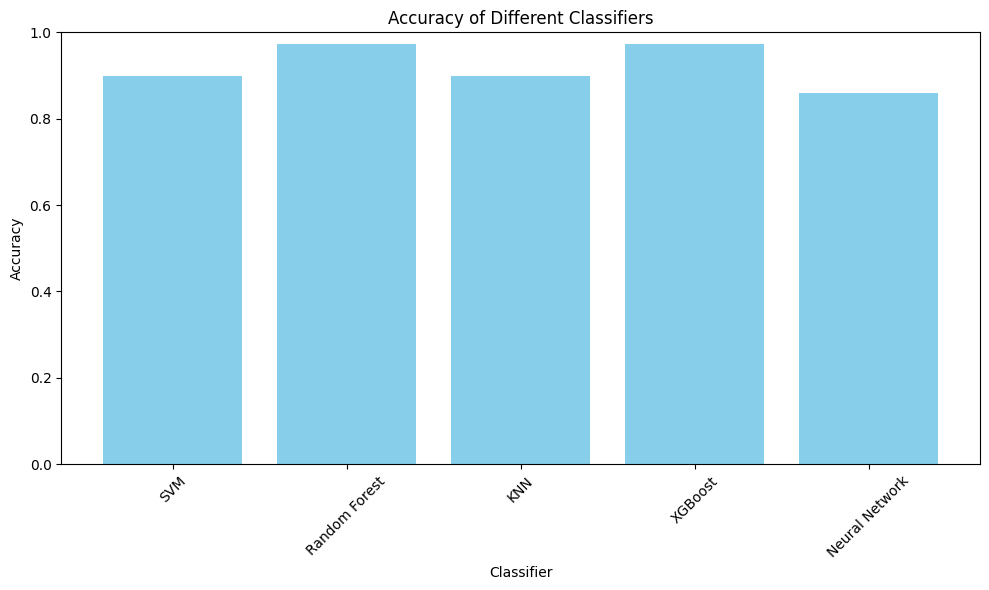

In [10]:
import matplotlib.pyplot as plt

# Initialize a dictionary to store accuracy scores
accuracy_scores = {}

# Loop through classifiers and calculate accuracy scores
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)

    # Calculate accuracy and store in dictionary
    accuracy = accuracy_score(y_val, y_pred)
    accuracy_scores[name] = accuracy

# Plotting the accuracy scores
plt.figure(figsize=(10, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color='skyblue')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classifiers')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlap of labels
plt.show()


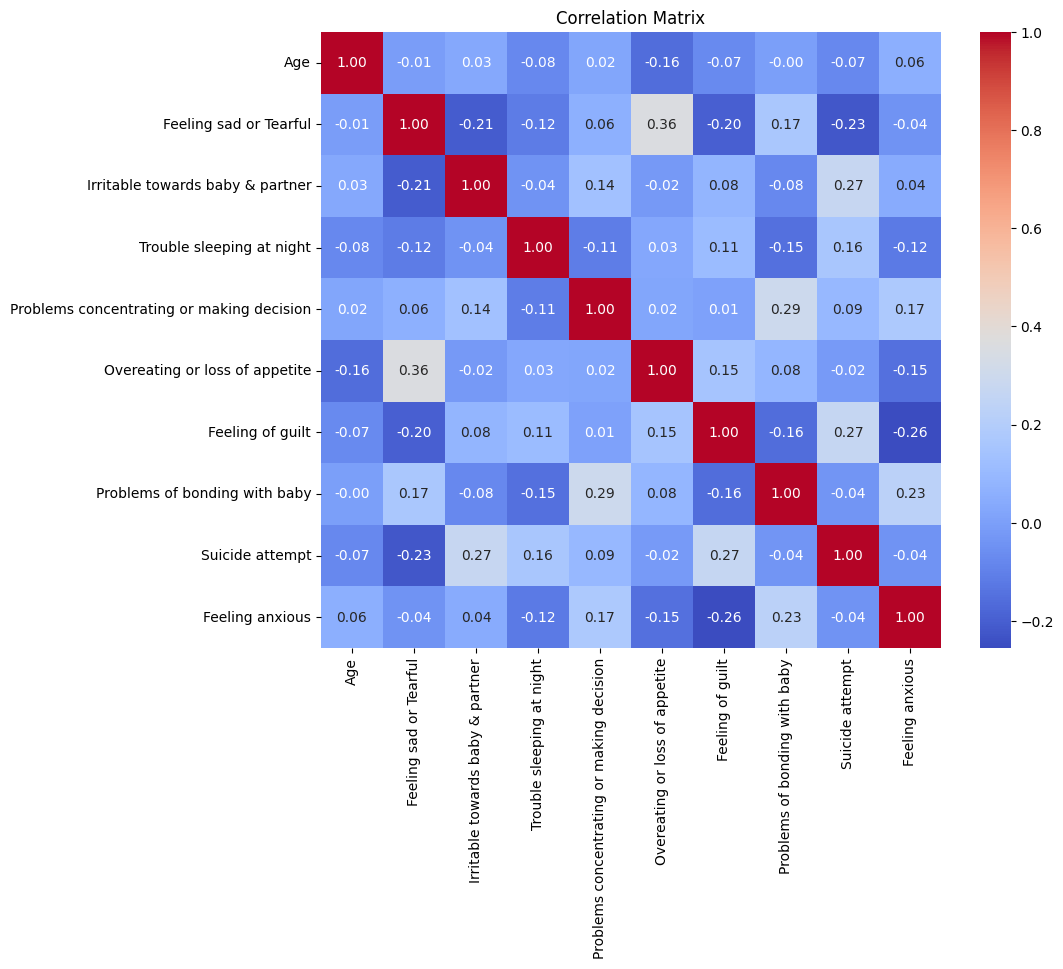

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = df.corr()

# Generate a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


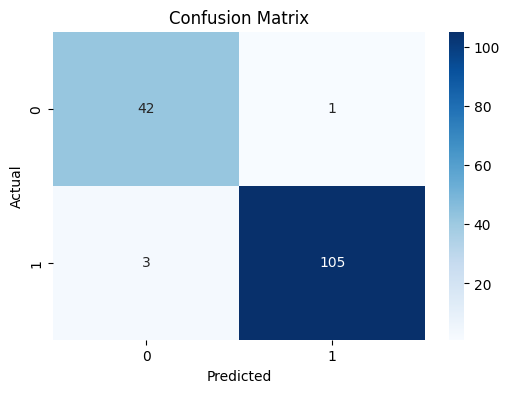

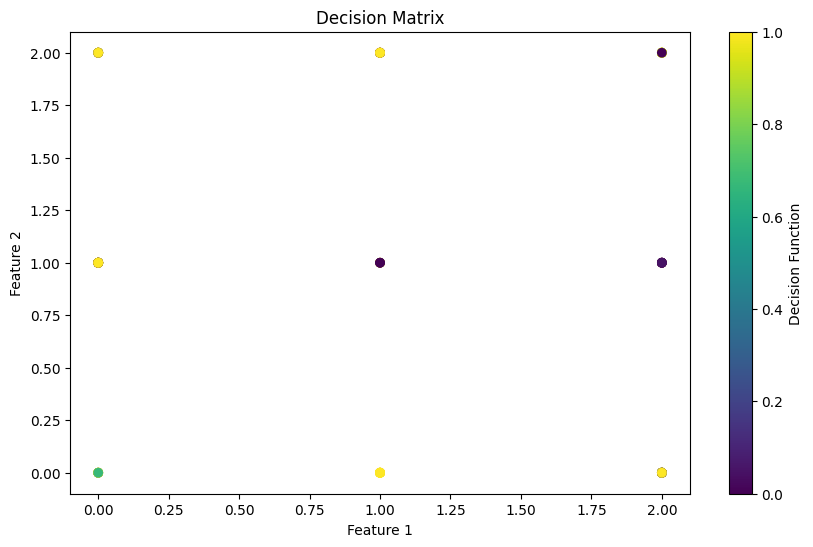

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Decision matrix
decision_matrix = best_model.predict_proba(X_test)[:, 1]  # Example for RandomForestClassifier
plt.figure(figsize=(10, 6))
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=decision_matrix, cmap='viridis')
plt.colorbar(label='Decision Function')
plt.title('Decision Matrix')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
